In [81]:
import copy
import networkx as nx
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def powerlaw(D, lamb, p0):
    x = np.arange(1,D)
    x = np.asarray(x, dtype=float)
    x = x**(-lamb)
    x = x/x.sum(axis=0)*(1-p0)
    x = np.insert(x, 0, p0, axis=0)
    return x

In [83]:
N = 34 #number of agents
T = 100 #period
largeprime = 6700417

In [104]:
#clock
phase = np.asarray(np.random.rand(N,N)*T, dtype=int)
period = np.asarray(np.ones([N,N])*T, dtype=int)
for i in range(N):
    for j in range(i+1):
        phase[i][j] = largeprime
        period[i][j] = largeprime


In [105]:
phase

array([[13400834,       44,       89, ...,       34,       12,       21],
       [13400834, 13400834,       57, ...,       98,       41,       19],
       [13400834, 13400834, 13400834, ...,       30,        0,       21],
       ..., 
       [13400834, 13400834, 13400834, ..., 13400834,       11,       88],
       [13400834, 13400834, 13400834, ..., 13400834, 13400834,       80],
       [13400834, 13400834, 13400834, ..., 13400834, 13400834, 13400834]])

In [52]:
G = nx.karate_club_graph()

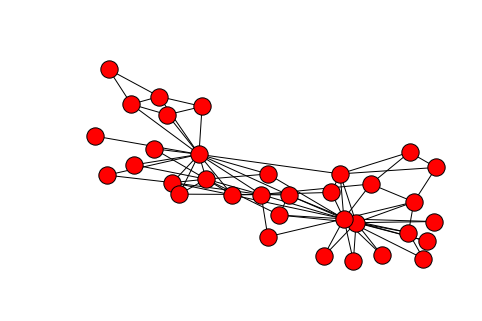

In [71]:
nx.draw(G)

In [32]:
infected = set(np.random.choice(range(N), int(q*N),replace=False))
clean = set(np.arange(N)) - infected
infecsize = np.zeros(2*N)
    for step in range(2*N):
        infecsize[step] = len(infected)/N
        downstream = set()
        for n in infected:
            downstream.update(set(G.successors(n)))

        H = G.copy()
        H.remove_nodes_from(infected)
        hscc = nx.strongly_connected_components_recursive(H)
        
        activation = np.asarray(np.remainder(phase + step, period) == 0, 

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [78]:
np.remainder([[3,4],[5,6]], [[2,2],[2,2]])

array([[1, 0],
       [1, 0]])

In [90]:
activation = np.where(np.remainder(phase + 24, period) == 0)[0]

In [106]:
test = np.remainder(phase + 24, period)

In [107]:
test

array([[24, 68, 13, ..., 58, 36, 45],
       [24, 24, 81, ..., 22, 65, 43],
       [24, 24, 24, ..., 54, 24, 45],
       ..., 
       [24, 24, 24, ..., 24, 35, 12],
       [24, 24, 24, ..., 24, 24,  4],
       [24, 24, 24, ..., 24, 24, 24]])

In [103]:
13%2

1